Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
Number of classes: 10


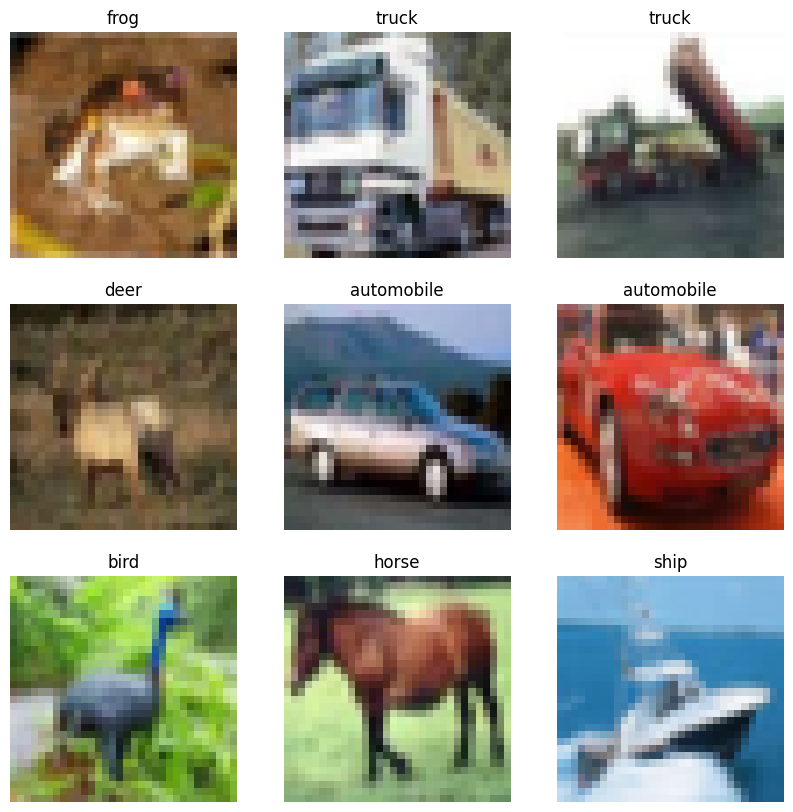

In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# EDA
print(f"Training data shape: {x_train.shape}")  # (50000, 32, 32, 3)
print(f"Testing data shape: {x_test.shape}")    # (10000, 32, 32, 3)
print(f"Number of classes: {len(np.unique(y_train))}")  # 10

# Plot sample images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis("off")
plt.show()

In [7]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(x_train)

# Split into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Train the model
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    validation_data=(x_val, y_val),
    epochs=50,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.2717 - loss: 1.9596 - val_accuracy: 0.5068 - val_loss: 1.3745 - learning_rate: 0.0010
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.4620 - loss: 1.4860 - val_accuracy: 0.5570 - val_loss: 1.2105 - learning_rate: 0.0010
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.5252 - loss: 1.3275 - val_accuracy: 0.6223 - val_loss: 1.0483 - learning_rate: 0.0010
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.5566 - loss: 1.2506 - val_accuracy: 0.6160 - val_loss: 1.0559 - learning_rate: 0.0010
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.5826 - loss: 1.1783 - val_accuracy: 0.6599 - val_loss: 0.9636 - learning_rate: 0.0010
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.6115 - loss: 1.1148 - val_accuracy: 0.6598 - val_loss: 0.9699 - learning_rate: 0.0010
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.6249 - loss: 1.0700

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification report
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

# Confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print(conf_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7950 - loss: 0.6277
Test Accuracy: 0.7916
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

    airplane       0.80      0.84      0.82      1000
  automobile       0.87      0.93      0.90      1000
        bird       0.79      0.62      0.70      1000
         cat       0.66      0.55      0.60      1000
        deer       0.78      0.77      0.77      1000
         dog       0.76      0.66      0.71      1000
        frog       0.76      0.90      0.82      1000
       horse       0.80      0.87      0.83      1000
        ship       0.90      0.87      0.89      1000
       truck       0.79      0.91      0.85      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000

[[839  23  14   8  10   1   9  11  38  47]
 [  4 932   0   1   0   1   2   1   6  53]
 [ 73   8 623  36

In [10]:
model.save("cifar10_cnn_model.h5")

In [11]:
# Install required libraries
!pip install fastapi uvicorn nest-asyncio pyngrok numpy pillow tensorflow requests

# Import libraries
from fastapi import FastAPI, File, UploadFile, HTTPException
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image
import io
import nest_asyncio
from pyngrok import ngrok
import uvicorn

# Create the FastAPI app
app = FastAPI()

# Load the model
model = load_model("cifar10_cnn_model.h5")  # Ensure the model file is uploaded to Colab

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Preprocess function
def preprocess_image(image):
    image = image.resize((32, 32))  # Resize image to 32x32
    image = np.array(image) / 255.0  # Normalize pixel values
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Root endpoint
@app.get("/")
def read_root():
    return {"message": "Welcome to the CIFAR-10 Image Classification API!"}

# Prediction endpoint
@app.post("/predict")
async def predict(file: UploadFile = File(...)):
    # Validate file type
    if file.content_type not in ["image/jpeg", "image/png"]:
        raise HTTPException(status_code=400, detail="Invalid file type. Please upload a JPEG or PNG image.")

    # Read and preprocess the image
    image = Image.open(io.BytesIO(await file.read()))
    image = preprocess_image(image)

    # Make prediction
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction, axis=1)[0]
    confidence = float(np.max(prediction))

    return {
        "predicted_class": class_names[predicted_class],
        "confidence": confidence
    }

# Set up ngrok
ngrok.set_auth_token("2uF4Ik2i4AHELQMzxCxnwxRsUKJ_3jCzFtfWzy9RKr25Rtct1")  # Replace with your ngrok authtoken
ngrok_tunnel = ngrok.connect(8000)
print("Public URL:", ngrok_tunnel.public_url)

# Apply nest_asyncio to allow running async code in Jupyter
nest_asyncio.apply()

# Start the FastAPI server
print("Starting FastAPI server...")
uvicorn.run(app, host="0.0.0.0", port=8000)

RuntimeError: Form data requires "python-multipart" to be installed. 
You can install "python-multipart" with: 

pip install python-multipart


In [12]:
import requests

url = "https://b8bf-104-196-232-188.ngrok-free.app"
file_path = "test_image.jpg"

with open(file_path, "rb") as file:
    response = requests.post(url, files={"file": file})

print(response.json())

FileNotFoundError: [Errno 2] No such file or directory: 'test_image.jpg'

In [13]:
pip install python-multipart


Note: you may need to restart the kernel to use updated packages.


In [14]:
!pip install fastapi uvicorn nest-asyncio pyngrok

In [15]:
from fastapi import FastAPI
import nest_asyncio
from pyngrok import ngrok
import uvicorn

# Create the FastAPI app
app = FastAPI()

@app.get("/")
def read_root():
    return {"message": "Hello, World!"}

In [16]:
# Set up ngrok
ngrok_tunnel = ngrok.connect(8000)
print("Public URL:", ngrok_tunnel.public_url)

# Apply nest_asyncio to allow running async code in Jupyter
nest_asyncio.apply()

# Start the FastAPI server
uvicorn.run(app, host="0.0.0.0", port=8000)

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.

In [17]:
from pyngrok import ngrok

# Set your ngrok authtoken
ngrok.set_auth_token("2uF4Ik2i4AHELQMzxCxnwxRsUKJ_3jCzFtfWzy9RKr25Rtct1")

# Connect to port 8000
ngrok_tunnel = ngrok.connect(8000)
print("Public URL:", ngrok_tunnel.public_url)

Public URL: https://5e35-34-136-34-95.ngrok-free.app


In [ ]:
# Install required libraries
!pip install fastapi uvicorn nest-asyncio pyngrok

# Import libraries
from fastapi import FastAPI
import nest_asyncio
from pyngrok import ngrok
import uvicorn

# Create the FastAPI app
app = FastAPI()

@app.get("/")
def read_root():
    return {"message": "Hello, World!"}

# Set up ngrok
ngrok_tunnel = ngrok.connect(8000)
print("Public URL:", ngrok_tunnel.public_url)

# Apply nest_asyncio to allow running async code in Jupyter
nest_asyncio.apply()

# Start the FastAPI server
uvicorn.run(app, host="0.0.0.0", port=8000)

Public URL: https://7a43-34-136-34-95.ngrok-free.app


INFO:     Started server process [31]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


In [ ]:
import requests

# API URL
url = "https://60c9-104-196-232-188.ngrok-free.app/predict"

# Path to your image file
file_path = "test_image.jpg"

# Send the image to the API
with open(file_path, "rb") as file:
    response = requests.post(url, files={"file": file})

# Print the response
print(response.json())

In [ ]:
FROM python:3.9-slim

WORKDIR /app
COPY requirements.txt .
RUN pip install -r requirements.txt

COPY . .

CMD ["uvicorn", "app:app", "--host", "0.0.0.0", "--port", "8000"]

In [20]:
docker build -t cifar10-api .
docker run -p 8000:8000 cifar10-api

SyntaxError: invalid syntax (<ipython-input-20-2dcbe9066718>, line 1)